In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
kpi = pd.read_excel('siste_rente_kpi.xlsx')

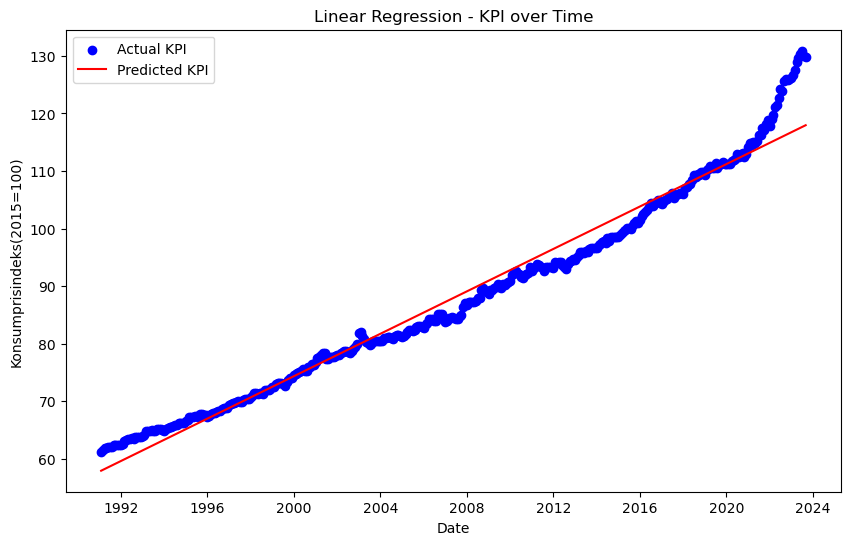

In [3]:
# Convert 'Dato' to datetime object
kpi['Dato'] = pd.to_datetime(kpi['Dato'])

kpi['Dato_numeric'] = (kpi['Dato'] - kpi['Dato'].min()).dt.days

X_kpi = kpi[['Dato_numeric']]
y_kpi = kpi['Konsumprisindeks(2015=100)']

model_kpi_r = LinearRegression()
model_kpi_r.fit(X_kpi, y_kpi)

predictions_kpi = model_kpi_r.predict(X_kpi)

# Extract the first Y value and corresponding date
start_date = kpi['Dato'].min()
start_y_value = y_kpi.iloc[0]

# Calculate the slope for a 2.5% yearly increase
slope =  0.025  # 2.5% as a decimal

# Calculate the intercept based on the start point
intercept = start_y_value - slope * (kpi['Dato'] - start_date).dt.days.iloc[0]

plt.figure(figsize=(10, 6))

# Plotting the data
plt.scatter(kpi['Dato'], y_kpi, color='blue', label='Actual KPI')

# Plotting the regression line
plt.plot(kpi['Dato'], predictions_kpi, color='red', label='Predicted KPI')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Konsumprisindeks(2015=100)')
plt.title('Linear Regression - KPI over Time')
plt.legend()
plt.show()

In [4]:
def model(y, t, k, T, damping):
    I, inflation = y
    dI_dt = k * (inflation - T)
    dinflation_dt = -k * (I - T) - damping * (inflation - T)
    return [np.clip(dI_dt, -0.05, 0.10), np.clip(dinflation_dt, -0.05, 0.10)]

In [5]:
initial_rente = 0.0425
initial_inflasjon = 0.061
mal_inflasjon = 0.02
k = 0.05
damping = 0.1

# Tidsenheter
t = np.linspace(0, 12*25, 300)

In [6]:
resultat = odeint(model, [initial_rente, initial_inflasjon], t, args=(k, mal_inflasjon, damping))

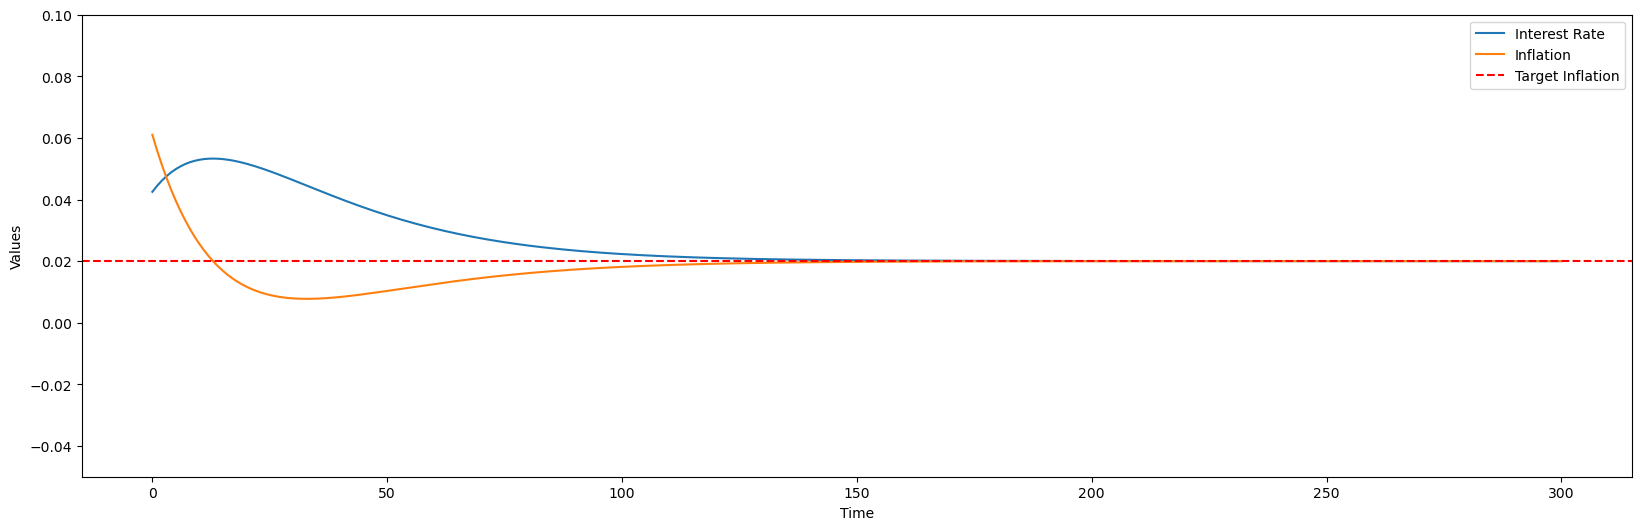

In [7]:
# Increase the size of the plot
plt.figure(figsize=(20, 6))

# Plot the results
plt.plot(t, resultat[:, 0], label='Interest Rate')
plt.plot(t, resultat[:, 1], label='Inflation')
plt.axhline(y=mal_inflasjon, color='r', linestyle='--', label='Target Inflation')
plt.xlabel('Time')
plt.ylabel('Values')
plt.ylim([-0.05, 0.10])  # Set y-axis limits
plt.legend()
plt.show()

In [8]:
def model_inflation(t, inflation, k, T, damping):
    dinflation_dt = -k * (inflation - T) - damping * (inflation - T)
    return np.clip(dinflation_dt, -0.05, 0.10)

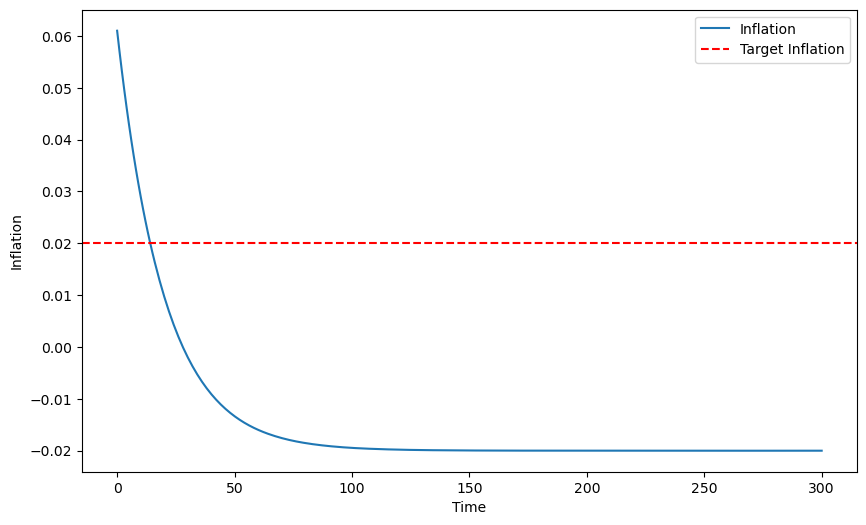

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def model_inflation(t, inflation, k, T, damping):
    dinflation_dt = k * (inflation + T) - damping * (inflation + T)
    return np.clip(dinflation_dt, -0.05, 0.10)

initial_rente = 0.0425
initial_inflasjon = 0.061
mal_inflasjon = 0.02
k = 0.05
damping = 0.1

t_span = (0, 12*25)
t_eval = np.linspace(t_span[0], t_span[1], 300)

sol = solve_ivp(model_inflation, t_span, [initial_inflasjon], args=(k, mal_inflasjon, damping), t_eval=t_eval)

plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Inflation')
plt.axhline(y=mal_inflasjon, color='r', linestyle='--', label='Target Inflation')
plt.xlabel('Time')
plt.ylabel('Inflation')
plt.legend()
plt.show()

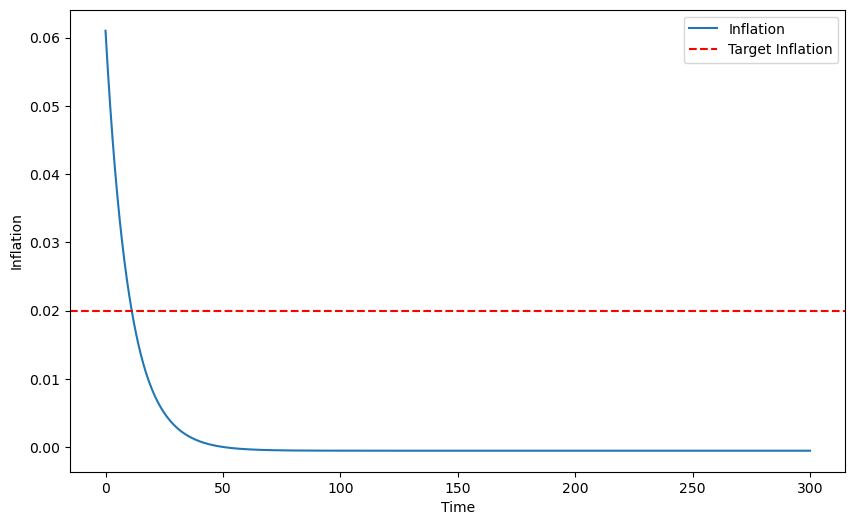

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def model_inflation(t, inflation, k, target_inflation, damping):
    dinflation_dt = -k * (inflation - target_inflation) - damping * inflation
    drente = np.clip(dinflation_dt, 0, np.inf)  # Clip to zero or positive values
    dinflation_dt = -k * drente - damping * inflation
    return np.clip(dinflation_dt, -0.05, 0.10)

initial_rente = 0.0425
initial_inflasjon = 0.061
target_inflation = 0.02
k = 0.05
damping = 0.1

t_span = (0, 12*25)
t_eval = np.linspace(t_span[0], t_span[1], 300)

sol = solve_ivp(model_inflation, t_span, [initial_inflasjon], args=(k, target_inflation, damping), t_eval=t_eval)

plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Inflation')
plt.axhline(y=target_inflation, color='r', linestyle='--', label='Target Inflation')
plt.xlabel('Time')
plt.ylabel('Inflation')
plt.legend()
plt.show()

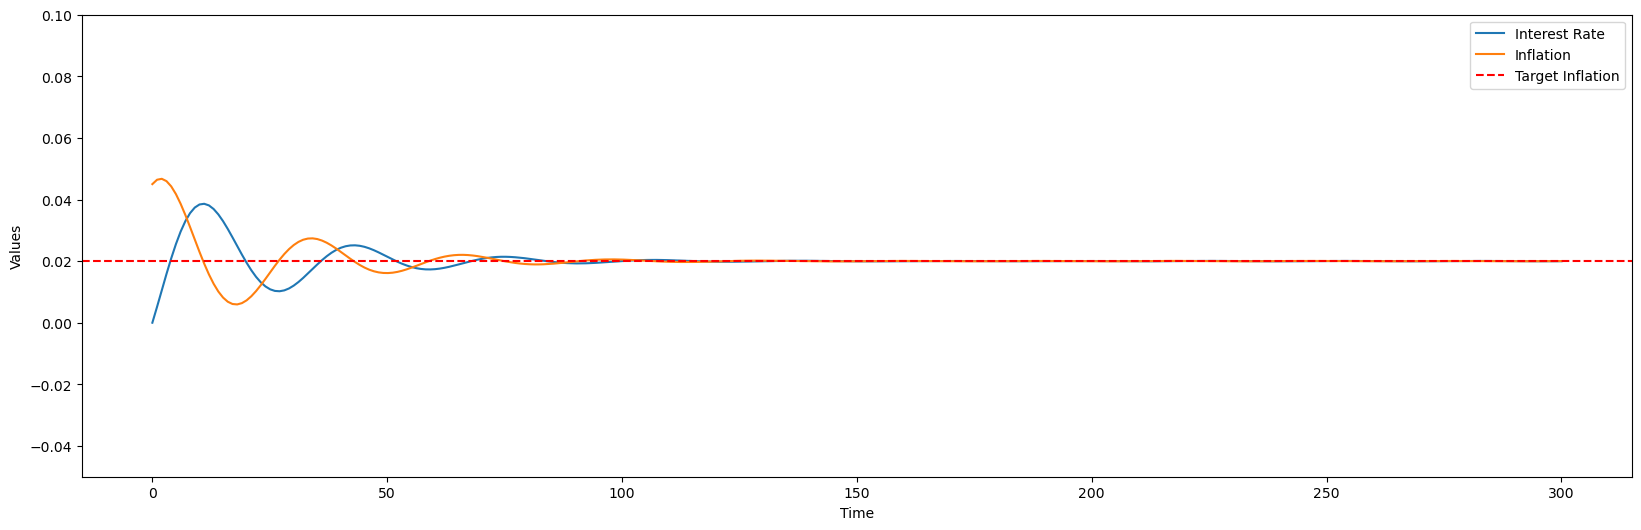

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def model(t, y, k, T, damping):
    rente_now, inflation = y
    drente = k * (inflation - T)
    dinflation_dt = -k * (rente_now - T) - damping * (inflation - T)
    return [np.clip(drente, -0.05, 0.10), np.clip(dinflation_dt, -0.05, 0.10)]

initial_rente = 0.00
initial_inflasjon = 0.045
mal_inflasjon = 0.02
k = 0.2
damping = 0.08

# Tidsenheter
t_span = (0, 12*25)
t_eval = np.linspace(t_span[0], t_span[1], 300)

sol = solve_ivp(model, t_span, [initial_rente, initial_inflasjon], args=(k, mal_inflasjon, damping), t_eval=t_eval)

# Increase the size of the plot
plt.figure(figsize=(20, 6))

# Plot the results
plt.plot(sol.t, sol.y[0], label='Interest Rate')
plt.plot(sol.t, sol.y[1], label='Inflation')
plt.axhline(y=mal_inflasjon, color='r', linestyle='--', label='Target Inflation')
plt.xlabel('Time')
plt.ylabel('Values')
plt.ylim([-0.05, 0.10])  # Set y-axis limits
plt.legend()
plt.show()

In [12]:
rente = [inner_list[0] for inner_list in resultat]

In [13]:
def serielan_kalkulator(lanbelop, renteliste, antall_ar):
    terminer = antall_ar * 12
    monthly_payments = []
    avdrag = lanbelop/terminer
    total_betalt = 0

    for i, monthly_interest_rate in enumerate(renteliste):
        
        lanbelop = lanbelop - avdrag

        rentebeløp = (lanbelop * monthly_interest_rate)/12

        terminbetaling = avdrag + rentebeløp

        total_betalt += terminbetaling

        monthly_payments.append({
            "Rente": monthly_interest_rate,
            "Gjennværende lån": lanbelop,
            "Terminbeløp": terminbetaling,
            "Betalt lån måend": avdrag,
            "Betalt rente måend": rentebeløp,
            "total betalt": total_betalt
        })

        if i + 1 == terminer:
            break

    # Create the DataFrame
    result_df = pd.DataFrame(monthly_payments)

    # Set formatting for float values in the DataFrame
    pd.options.display.float_format = '{:.4f}'.format

    return result_df


Test serial

In [14]:
lan = 2000000
aar = 20

In [15]:
serie = serielan_kalkulator(lan , rente , aar)
serie.tail(50)

,Rente,Gjennværende lån,Terminbeløp,Betalt lån måend,Betalt rente måend,total betalt
190,0.0200,408333.3333,9015.4380,8333.3333,682.1046,2218757.8723
191,0.0200,400000.0000,9001.4505,8333.3333,668.1172,2227759.3229
192,0.0200,391666.6667,8987.4687,8333.3333,654.1354,2236746.7916
193,0.0200,383333.3333,8973.4923,8333.3333,640.1590,2245720.2839
194,0.0200,375000.0000,8959.5209,8333.3333,626.1876,2254679.8048
195,0.0200,366666.6667,8945.5543,8333.3333,612.2210,2263625.3591
196,0.0200,358333.3333,8931.5922,8333.3333,598.2589,2272556.9513
197,0.0200,350000.0000,8917.6344,8333.3333,584.3011,2281474.5857
198,0.0200,341666.6667,8903.6807,8333.3333,570.3473,2290378.2664
199,0.0200,333333.3333,8889.7307,8333.3333,556.3974,2299267.9972


In [16]:
import pandas as pd

def annuitetslan_kalkulator(lanbelop, renteliste, antall_ar):
    terminer = antall_ar * 12
    monthly_payments = []
    
    lanbelop = lanbelop
    total_betalt = 0

    for i , monthly_interest_rate in enumerate(renteliste):
        avdrag = lanbelop * (monthly_interest_rate * (1 + monthly_interest_rate)**(terminer - i)) / ((1 + monthly_interest_rate)**(terminer - i) - 1)

        rentebeløp = lanbelop * monthly_interest_rate

        terminbetaling = avdrag + rentebeløp
        
        avdrag = terminbetaling - rentebeløp

        lanbelop -= avdrag

        total_betalt += terminbetaling

        monthly_payments.append({
            "Rente": monthly_interest_rate,
            "Gjennværende lån": lanbelop,
            "Terminbeløp": terminbetaling,
            "Betalt lån måend": avdrag,
            "Betalt rente måend": rentebeløp,
            "total betalt": total_betalt
        })

    # Create the DataFrame
    result_df = pd.DataFrame(monthly_payments)

    # Set formatting for float values in the DataFrame
    pd.options.display.float_format = '{:.4f}'.format

    return result_df

Test annuitets

In [17]:
annu = annuitetslan_kalkulator(lan , rente , aar)

C:\Users\even\AppData\Local\Temp\ipykernel_1268\3140732443.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  avdrag = lanbelop * (monthly_interest_rate * (1 + monthly_interest_rate)**(terminer - i)) / ((1 + monthly_interest_rate)**(terminer - i) - 1)
C:\Users\even\AppData\Local\Temp\ipykernel_1268\3140732443.py:15: RuntimeWarning: invalid value encountered in double_scalars
  terminbetaling = avdrag + rentebeløp


In [18]:
annu.head(50)

,Rente,Gjennværende lån,Terminbeløp,Betalt lån måend,Betalt rente måend,total betalt
0,0.0425,1914996.0989,170003.9011,85003.9011,85000.0000,170003.9011
1,0.0444,1829912.4588,170164.6634,85083.6402,85081.0232,340168.5644
2,0.0461,1745524.1442,168774.7825,84388.3146,84386.4680,508943.3470
3,0.0476,1662474.6763,166097.5706,83049.4679,83048.1027,675040.9175
4,0.0488,1581287.0048,162374.2896,81187.6715,81186.6181,837415.2071
5,0.0499,1502375.4890,157822.1862,78911.5158,78910.6703,995237.3933
6,0.0508,1426058.2000,152633.8746,76317.2890,76316.5856,1147871.2679
7,0.0515,1352569.0800,146977.6353,73489.1200,73488.5153,1294848.9031
8,0.0521,1282069.5738,140998.4769,70499.5062,70498.9706,1435847.3800
9,0.0526,1214659.5033,134819.6535,67410.0704,67409.5830,1570667.0335
